#### 4일차 복습 시작

In [1]:
import numpy as np
import cv2
import sys

img = cv2.imread('Ch_2_Opencv_basic/fig/puppy.bmp', 1)

if img is None:
    sys.exit('실패')

h, w = img.shape[:2]
img_re = cv2.resize(img, (W*2, h*2), interpolation = cv2.INTER_AREA)
    
cv2.namedWindow('image', cv2.WINDOW_GUI_NORMAL)
cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

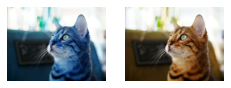

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

imgBGR = cv2.imread('Ch_1_Opencv_Intro/fig/cat.bmp', 1)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.subplot(131), plt.imshow(imgBGR), plt.axis('off')
plt.subplot(132), plt.imshow(imgRGB), plt.axis('off')

plt.show()

In [9]:
import os
import numpy as np
import cv2
import sys

# glob.glob('sample_photo/*.jpg')# -> 간편 경로 리스트
background_img_path = os.listdir('sample_photo/')

cv2.namedWindow("Background_image", cv2.WINDOW_NORMAL)
cv2.setWindowProperty('Background_image',
                      cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)
index = 0
while True:
    img = cv2.imread('sample_photo/' + background_img_path[index])
    cv2.imshow('Background_image', img)
    
    index += 1
    if index >= len(background_img_path):
        index = 0
        
    if cv2.waitKey(2000) == ord('q'):
        break

cv2.destroyAllWindows()

In [10]:
import numpy as np
import cv2
import sys

img1 = np.ones((400, 600, 3), dtype=np.uint8)*255

cv2.imshow('image1', img1)
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
import numpy as np
import cv2
import sys

src = cv2.imread('Ch_2_Opencv_basic/fig/airplane.bmp')
mask = cv2.imread('Ch_2_Opencv_basic/fig/mask_plane.bmp')
dst = cv2.imread('Ch_2_Opencv_basic/fig/green.png')

h, w = src.shape[:2]
img_re = cv2.resize(dst, (w, h), interpolation = cv2.INTER_AREA)
# img  = cv2.resize(img, (640, 480), interpolation = cv2.INTER_AREA)

cv2.copyTo(src, mask, img_re)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', img_re)

cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
import numpy as np
import cv2
import sys

src = cv2.imread('Ch_2_Opencv_basic/fig/cow.png')
dst = cv2.imread('Ch_2_Opencv_basic/fig/green.png')

srcGray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

_,mask = cv2.threshold(srcGray, 240, 255, cv2.THRESH_BINARY_INV)

h, w = src.shape[:2]
#초원 크기를 소 사진 크기와 같게 비율을 바꿈
dst = cv2.resize(dst, (w, h), interpolation = cv2.INTER_AREA)

cv2.copyTo(src, mask, img_re)

if src is None or dst is None:
    sys.exit('불러오기 실패')

# 합성
cv2.copyTo(src, mask, dst)

# dst = cv2.resize(dst, (w*2, h*2), interpolation = cv2.INTER_AREA)

    
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('src_Gray', srcGray)
cv2.imshow('mask', mask)
# print(retval)

cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
import numpy as np
import cv2
import sys

src = cv2.imread('Ch_2_Opencv_basic/fig/puppy.bmp')
# IMREAD_UNCHANGED로 알파채널 불러오기
sunglass = cv2.imread('Ch_2_Opencv_basic/fig/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)
# print(src.shape)
# print(sunglass.shape)

sunglass = cv2.resize(sunglass, (300, 150), interpolation = cv2.INTER_AREA)

mask = sunglass[ : , : , -1]
print(mask.shape)
sunglass = sunglass[ : , : , :3]
print(sunglass.shape)
print(src.shape)

h, w = mask.shape[:2]
src_crop = src[120:120+h, 235:235+w]

cv2.copyTo(sunglass, mask, src_crop)
src_crop[mask > 0] = 128, 0, 255

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('sunglass', sunglass)
cv2.imshow('src_crop', src_crop)

cv2.waitKey()
cv2.destroyAllWindows()

(150, 300)
(150, 300, 3)
(480, 640, 3)


### 그리기 함수

In [72]:
import numpy as np
import cv2
import sys

canvas = np.full((600, 1200, 3), 255, np.uint8)

# 직선 그리기
cv2.line(canvas,   #그릴 곳
        (50, 50),  # 시작점
        (300, 50), # 끝점
        (0, 0, 255), #색상
        5,          #두께
        cv2.LINE_8) #선 타입
cv2.line(canvas,
        (300, 50),
        (150, 300),
        (0, 0, 255),
        5,
        cv2.LINE_8)
# ㅣ
cv2.line(canvas,
        (400, 30),
        (400, 350),
        (0, 0, 0),
        3,
        cv2.LINE_8)
# ㅁ
cv2.rectangle(canvas,
        (50, 400),
        (400, 550),
        (128, 128, 128),
        -1,
        cv2.LINE_8)
# 같은 그림 다른 방법
cv2.rectangle(canvas,
        (50, 400, 350, 100),
        (8, 0, 128),
        -1,
        cv2.LINE_8)
# ㅇ
cv2.circle(canvas, (600, 150), 100, (0, 0, 145), 15, cv2.LINE_AA)
# 찌그러진 원
cv2.ellipse(canvas, (600, 150), (50, 100), 40, 0, 180, (0, 0, 255), 5, cv2.LINE_AA)
cv2.line(canvas,
        (800, 30),
        (800, 350),
        (0, 0, 0),
        3,
        cv2.LINE_8)

# 글자 삽입
test = 'hello'
cv2.putText(canvas, test, (700, 300), cv2.FONT_ITALIC, 2,
           (0, 200, 145), 3, cv2.LINE_AA)



cv2.imshow('canvas', canvas)
cv2.waitKey()
cv2.destroyAllWindows()

실습 1

In [123]:
# "인삼"은 도형으로
# 고려 인삼은 텍스트 삽입

import numpy as np
import cv2
import sys

canvas = np.full((600, 1200, 3), 255, np.uint8)

#인
cv2.circle(canvas, (130, 130), 80, (0, 200, 145), 5, cv2.LINE_AA)
# ㅣ
cv2.line(canvas,
        (330, 30),
        (330, 250),
        (0, 200, 145),
        3,
        cv2.LINE_8)
#ㄴ
cv2.line(canvas,   #그릴 곳
        (100, 300),  # 시작점
        (100, 400), # 끝점
        (0, 200, 145), #색상
        5,          #두께
        cv2.LINE_8) #선 타입
cv2.line(canvas,
        (100, 400),
        (350, 400),
        (0, 200, 145),
        5,
        cv2.LINE_8)

# 삼
cv2.line(canvas,
        (650, 50),
        (530, 230),
        (0, 200, 145),
        5,
        cv2.LINE_8)
cv2.line(canvas,
        (650, 50),
        (770, 230),
        (0, 200, 145),
        5,
        cv2.LINE_8)
# ㅣ
cv2.line(canvas,
        (850, 30),
        (850, 250),
        (0, 200, 145),
        3,
        cv2.LINE_8)
cv2.line(canvas,
        (850, 140),
        (950, 140),
        (0, 200, 145),
        3,
        cv2.LINE_8)
# ㅁ
cv2.rectangle(canvas,
        (600, 300),
        (850, 450),
        (0, 200, 145),
        3,
        cv2.LINE_8)

# 글자 삽입
test = 'Korea Ginseng'
cv2.putText(canvas, test, (300, 530), cv2.FONT_ITALIC, 2,
           (0, 0, 5), 3, cv2.LINE_AA)



cv2.imshow('canvas', canvas)
cv2.waitKey()
cv2.destroyAllWindows()

### 웹캠

In [126]:
import numpy as np
import cv2
import sys

wep_cam = cv2.VideoCapture('Ch_2_Opencv_basic/fig/raining.mp4')
wep_cam.isOpened()
#False면 카메라가 없는것

if not wep_cam.isOpened():
    print("카메라 작동 실패")
    wep_cam.release()
    sys.exit()
    
# 영상 너비, 높이 구하기
w = int(wep_cam.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(wep_cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(wep_cam.get(cv2.CAP_PROP_FPS)*0.7)
print(w, h, fps)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))
    
while True:
    ret, frame = wep_cam.read()
    
    if not ret:
        print("캠 열기 실패")
        break
        
    # 엣지 처리
    edge = cv2.Canny(frame, 50, 150)
    #가우시안 블러
    gblur = cv2.GaussianBlur(frame, (0, 0), 2)
    # 엣지 영상 저장하기 위한 RGB 처리
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
    
    # 영상 출력
    cv2.imshow('WepCam', frame)
    cv2.imshow('edge', edge)
    cv2.imshow('gblur', gblur)
    out.write(frame)
    
    if cv2.waitKey(20) == 27:
        break
        
wep_cam.release()
out.release()
cv2.destroyAllWindows()

1280 720 17
D I V X
